# Project
## Group members:
* Naga Datha Saikiran Battula - nb547

In [1]:
library(doParallel)

num_cores <- 10
cl <- makeCluster(num_cores)
registerDoParallel(cl)

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



# 1. Loading the Dataset

In [2]:
sales_train <- read.csv("./dataset/sales_train.csv")
test <- read.csv("./dataset/test.csv")
items <- read.csv("./dataset/items.csv")
item_categories <- read.csv("./dataset/item_categories.csv")
shops <- read.csv("./dataset/shops.csv")

# 2. Data Exploration and Preprocessing

In [3]:
str(sales_train)

'data.frame':	2935849 obs. of  6 variables:
 $ date          : chr  "02.01.2013" "03.01.2013" "05.01.2013" "06.01.2013" ...
 $ date_block_num: int  0 0 0 0 0 0 0 0 0 0 ...
 $ shop_id       : int  59 25 25 25 25 25 25 25 25 25 ...
 $ item_id       : int  22154 2552 2552 2554 2555 2564 2565 2572 2572 2573 ...
 $ item_price    : num  999 899 899 1709 1099 ...
 $ item_cnt_day  : num  1 1 -1 1 1 1 1 1 1 3 ...


In [4]:
summary(sales_train)

     date           date_block_num     shop_id      item_id     
 Length:2935849     Min.   : 0.00   Min.   : 0   Min.   :    0  
 Class :character   1st Qu.: 7.00   1st Qu.:22   1st Qu.: 4476  
 Mode  :character   Median :14.00   Median :31   Median : 9343  
                    Mean   :14.57   Mean   :33   Mean   :10197  
                    3rd Qu.:23.00   3rd Qu.:47   3rd Qu.:15684  
                    Max.   :33.00   Max.   :59   Max.   :22169  
   item_price        item_cnt_day     
 Min.   :    -1.0   Min.   : -22.000  
 1st Qu.:   249.0   1st Qu.:   1.000  
 Median :   399.0   Median :   1.000  
 Mean   :   890.9   Mean   :   1.243  
 3rd Qu.:   999.0   3rd Qu.:   1.000  
 Max.   :307980.0   Max.   :2169.000  

In [5]:
str(test)

'data.frame':	214200 obs. of  3 variables:
 $ ID     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ shop_id: int  5 5 5 5 5 5 5 5 5 5 ...
 $ item_id: int  5037 5320 5233 5232 5268 5039 5041 5046 5319 5003 ...


In [6]:
summary(test)

       ID            shop_id         item_id     
 Min.   :     0   Min.   : 2.00   Min.   :   30  
 1st Qu.: 53550   1st Qu.:16.00   1st Qu.: 5382  
 Median :107100   Median :34.50   Median :11203  
 Mean   :107100   Mean   :31.64   Mean   :11019  
 3rd Qu.:160649   3rd Qu.:47.00   3rd Qu.:16072  
 Max.   :214199   Max.   :59.00   Max.   :22167  

In [7]:
str(items)

'data.frame':	22170 obs. of  3 variables:
 $ item_name       : chr  "! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D" "!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]" "***В ЛУЧАХ СЛАВЫ   (UNV)                    D" "***ГОЛУБАЯ ВОЛНА  (Univ)                      D" ...
 $ item_id         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ item_category_id: int  40 76 40 40 40 40 40 40 40 40 ...


In [8]:
summary(items)

  item_name            item_id      item_category_id
 Length:22170       Min.   :    0   Min.   : 0.00   
 Class :character   1st Qu.: 5542   1st Qu.:37.00   
 Mode  :character   Median :11084   Median :40.00   
                    Mean   :11084   Mean   :46.29   
                    3rd Qu.:16627   3rd Qu.:58.00   
                    Max.   :22169   Max.   :83.00   

In [9]:
str(item_categories)

'data.frame':	84 obs. of  2 variables:
 $ item_category_name: chr  "PC - Гарнитуры/Наушники" "Аксессуары - PS2" "Аксессуары - PS3" "Аксессуары - PS4" ...
 $ item_category_id  : int  0 1 2 3 4 5 6 7 8 9 ...


In [10]:
summary(item_categories)

 item_category_name item_category_id
 Length:84          Min.   : 0.00   
 Class :character   1st Qu.:20.75   
 Mode  :character   Median :41.50   
                    Mean   :41.50   
                    3rd Qu.:62.25   
                    Max.   :83.00   

In [11]:
str(shops)

'data.frame':	60 obs. of  2 variables:
 $ shop_name: chr  "!Якутск Орджоникидзе, 56 фран" "!Якутск ТЦ \"Центральный\" фран" "Адыгея ТЦ \"Мега\"" "Балашиха ТРК \"Октябрь-Киномир\"" ...
 $ shop_id  : int  0 1 2 3 4 5 6 7 8 9 ...


In [12]:
summary(shops)

  shop_name            shop_id     
 Length:60          Min.   : 0.00  
 Class :character   1st Qu.:14.75  
 Mode  :character   Median :29.50  
                    Mean   :29.50  
                    3rd Qu.:44.25  
                    Max.   :59.00  

In [13]:
library(dplyr)
sales_train$date <- as.Date(sales_train$date,format="%d.%m.%Y")

sales_train$month <- format(sales_train$date,"%m")
sales_train$year <- format(sales_train$date,"%Y")
monthly_sales <- sales_train %>%
    group_by(year,month,shop_id,item_id) %>%
    summarise(total_sales = sum(item_cnt_day*item_price))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` has grouped output by 'year', 'month', 'shop_id'. You can override using the
`.groups` argument.


In [14]:
monthly_sales

year,month,shop_id,item_id,total_sales
<chr>,<chr>,<int>,<int>,<dbl>
2013,01,0,32,1326
2013,01,0,33,1041
2013,01,0,35,247
2013,01,0,43,221
2013,01,0,51,257
2013,01,0,61,195
2013,01,0,75,76
2013,01,0,88,76
2013,01,0,95,193


In [15]:
sales_train_data <- merge(sales_train,items,by="item_id",all.x=TRUE)
sales_train_data <- merge(sales_train_data,shops,by="shop_id",all.x=TRUE)

In [16]:
sales_train_data

shop_id,item_id,date,date_block_num,item_price,item_cnt_day,month,year,item_name,item_category_id,shop_name
<int>,<int>,<date>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
0,10851,2013-01-20,0,66,1,01,2013,ДЕНЬ ВЫБОРОВ (Регион),40,"!Якутск Орджоникидзе, 56 фран"
0,3394,2013-02-14,1,1249,1,02,2013,"Fable: Journey [только для Kinect] [Xbox 360, русская версия]",23,"!Якутск Орджоникидзе, 56 фран"
0,4475,2013-02-11,1,483,1,02,2013,"LittleBigPlanet (Essentials) [PSP, русская документация]",21,"!Якутск Орджоникидзе, 56 фран"
0,22014,2013-01-10,0,265,2,01,2013,ЭВОЛЮЦИЯ БОРНА,40,"!Якутск Орджоникидзе, 56 фран"
0,1830,2013-01-11,0,353,1,01,2013,"Battlefield 3 [PC, Jewel, русская версия]",30,"!Якутск Орджоникидзе, 56 фран"
0,3528,2013-02-12,1,964,1,02,2013,FloorPlan 3D. Версия 12.0 DeLuxe (Box),75,"!Якутск Орджоникидзе, 56 фран"
0,13101,2013-02-28,1,1806,1,02,2013,"Карта памяти Memory Stick Pro Duo HX 16GB (50МБ/с - чтение, 15МБ/с - запись)",4,"!Якутск Орджоникидзе, 56 фран"
0,18281,2013-01-03,0,110,1,01,2013,СБ. ВИА Золотые хиты Мой Адрес - Советский Союз,55,"!Якутск Орджоникидзе, 56 фран"
0,18424,2013-02-17,1,110,1,02,2013,СБ. Посвящение Михею,55,"!Якутск Орджоникидзе, 56 фран"


# Time series visualization

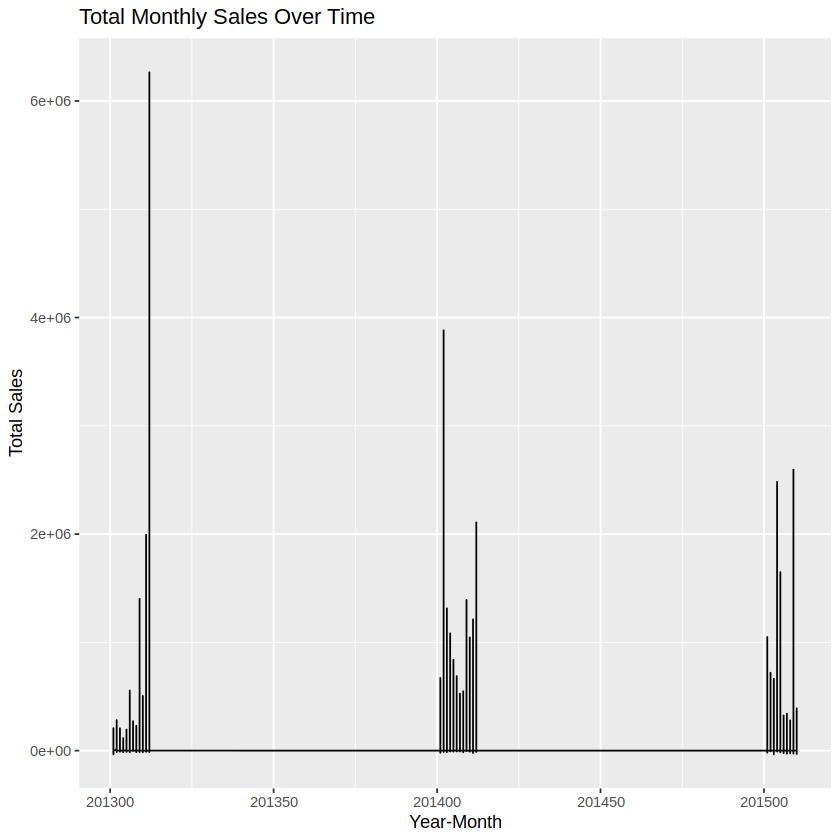

In [17]:
monthly_sales$year_month <- as.numeric(paste0(monthly_sales$year,monthly_sales$month))

library(ggplot2)
ggplot(monthly_sales,aes(x=year_month,y=total_sales))+
geom_line()+
labs(x="Year-Month",y="Total Sales",title="Total Monthly Sales Over Time")

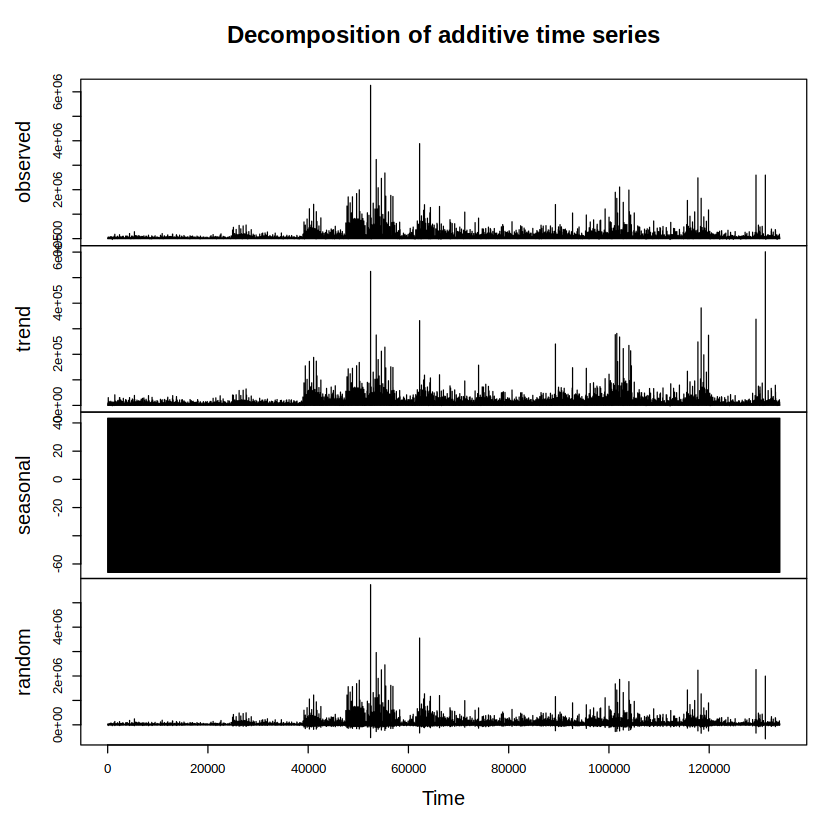

In [18]:
decomp <- decompose(ts(monthly_sales$total_sales,frequency=12))

plot(decomp)

In [19]:
library(forecast)

arima_model <- auto.arima(monthly_sales$total_sales)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [20]:
forecast_arima <-forecast(arima_model,h=4)

In [21]:
forecast_arima$mean

A Time Series:
[1] 970.8256 970.8256 970.8256 970.8256

In [22]:
set.seed(123)
train_index <- sample(1:nrow(monthly_sales),0.8*nrow(monthly_sales))
train_set <- monthly_sales[train_index,]
test_set <- monthly_sales[-train_index,]

In [23]:
library(randomForest)
num_trees <- 3
mtry <- sqrt(ncol(train_set)-1)

rf_model <- randomForest(total_sales ~ .,data=train_set,ntree=num_trees,mtry=mtry)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [24]:
predictions <- predict(rf_model,newdata=test_set)

In [25]:
rmse <- sqrt(mean((test_set$total_sales - predictions)^2))
mae <- mean(abs(test_set$total_sales - predictions))
mape <- mean(abs((test_set$total_sales - predictions) / test_set$total_sales)) * 100

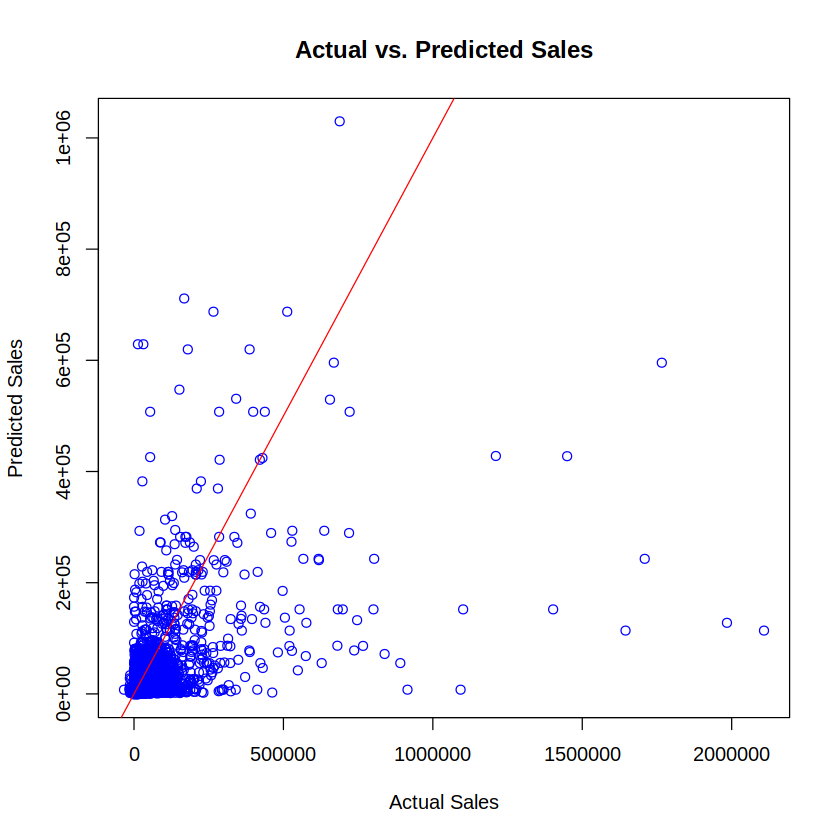

In [26]:
plot(test_set$total_sales, predictions, col = "blue", xlab = "Actual Sales", ylab = "Predicted Sales", main = "Actual vs. Predicted Sales")
abline(0, 1, col = "red")

## Data Cleaning

In [27]:
# Check for null values in rows
any_null_row <- apply(monthly_sales, 1, function(x) any(is.na(x)))
if (any(any_null_row)) {
  cat("There are rows containing null values.\n")
} else {
  cat("There are no rows containing null values.\n")
}

There are no rows containing null values.


In [28]:
summary(monthly_sales)

     year              month              shop_id         item_id     
 Length:1609124     Length:1609124     Min.   : 0.00   Min.   :    0  
 Class :character   Class :character   1st Qu.:21.00   1st Qu.: 5045  
 Mode  :character   Mode  :character   Median :31.00   Median :10497  
                                       Mean   :32.81   Mean   :10681  
                                       3rd Qu.:47.00   3rd Qu.:16060  
                                       Max.   :59.00   Max.   :22169  
  total_sales        year_month    
 Min.   : -33787   Min.   :201301  
 1st Qu.:    249   1st Qu.:201307  
 Median :    537   Median :201403  
 Mean   :   2112   Mean   :201385  
 3rd Qu.:   1490   3rd Qu.:201412  
 Max.   :6264230   Max.   :201510  

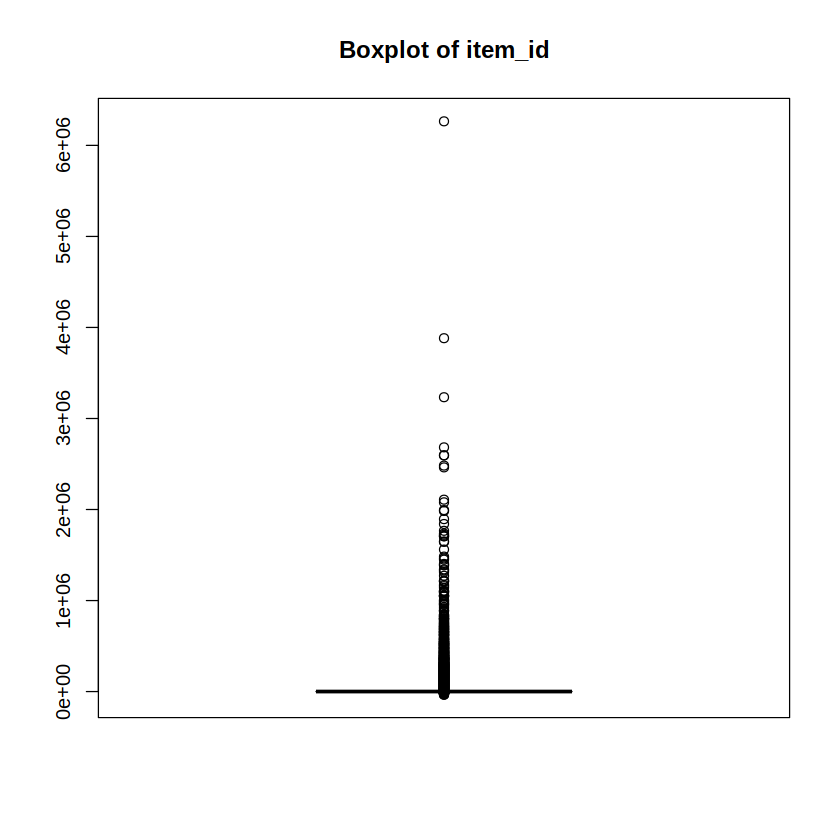

In [29]:
boxplot(monthly_sales$total_sales,main="Boxplot of item_id")

In [30]:
# Calculating IQR to get outliers
Q1 <- quantile(monthly_sales$total_sales, 0.25)
Q3 <- quantile(monthly_sales$total_sales, 0.75)
IQR <- Q3 - Q1

# Calculating threshold for detecting outliers
threshold <- 1.5 * IQR

outliers <- monthly_sales$total_sales < (Q1 - threshold) | monthly_sales$total_sales > (Q3 + threshold)

# cleaned_dataset removing outliers
cleaned_dataset <- monthly_sales[!outliers, ]

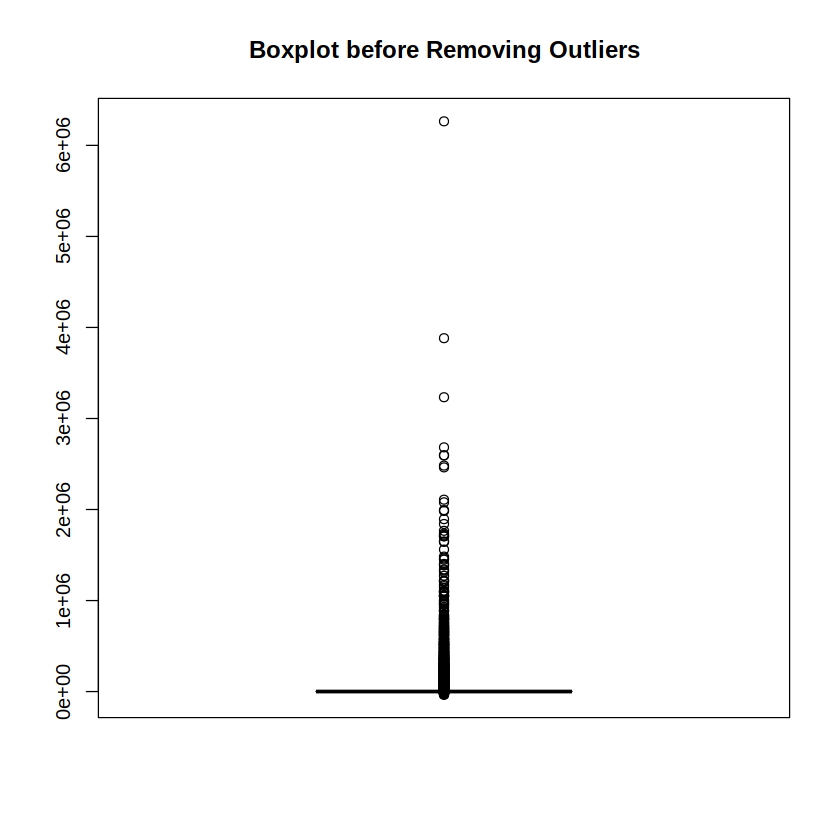

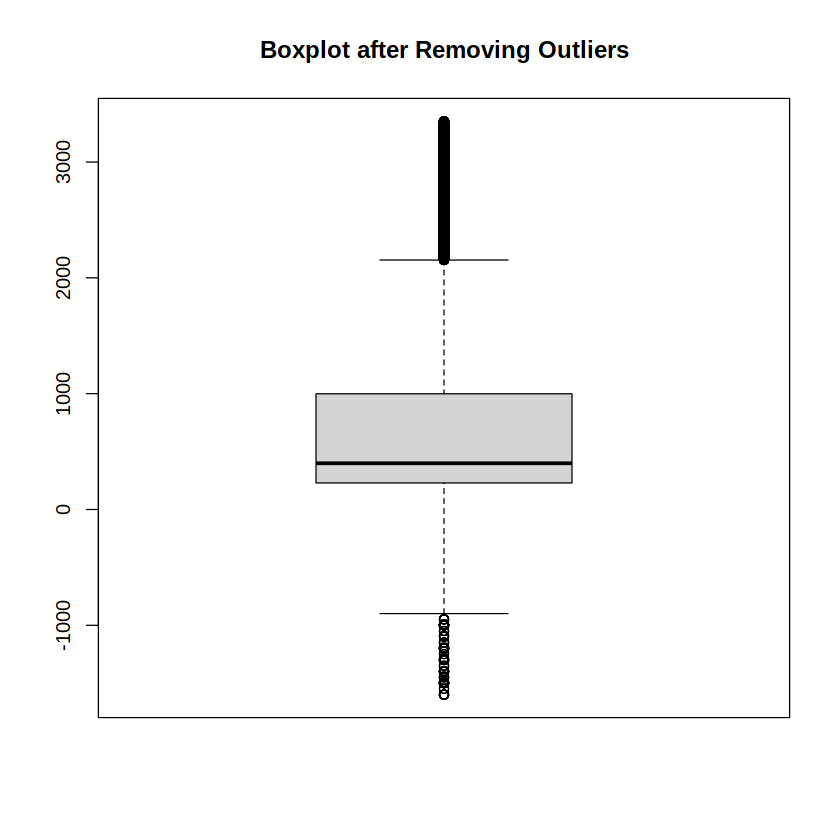

In [31]:
boxplot(monthly_sales$total_sales, main = "Boxplot before Removing Outliers")

boxplot(cleaned_dataset$total_sales, main = "Boxplot after Removing Outliers")

In [32]:
nrow(cleaned_dataset)

[1] 1440055

# Random Forest

## 1. randomForest from `library(randomForest)`

In [33]:
library(randomForest)

In [34]:
train_index <- sample(1:nrow(cleaned_dataset),0.8*nrow(cleaned_dataset))
train_set <- cleaned_dataset[train_index,]
test_set <- cleaned_dataset[-train_index,]
num_trees <- 5
mtry <- sqrt(ncol(train_set)-1)
registerDoParallel(cores=4)
rf_model <- randomForest(total_sales ~ .,data=train_set,ntree=num_trees,mtry=mtry,cluster=cl)

In [35]:
predictions <- predict(rf_model,newdata=test_set)

In [36]:
rmse <- sqrt(mean((test_set$total_sales - predictions)^2))
mae <- mean(abs(test_set$total_sales - predictions))
mape <- mean(abs((test_set$total_sales - predictions) / test_set$total_sales)) * 100

In [37]:
print(paste("RMSE using randomForest: ",rmse))

[1] "RMSE using randomForest:  610.189845058805"


## 2.ranger from `library(ranger)`
This uses randomForest with parallel processing on all cores or specified cores.<br>
Execution speed is 100 times faster than randomForest library and can handle complex datasets

In [38]:
library(ranger)


Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance




In [39]:
rf_model <- ranger(total_sales ~ ., data=train_set,num.tree=100,num.threads=detectCores())

In [40]:
predictions <- predict(rf_model, data = test_set)$predictions
rmse <- sqrt(mean((test_set$total_sales - predictions)^2))
print(paste("RMSE using ranger library (randomForest): ",rmse))

[1] "RMSE using ranger library (randomForest):  602.6295888357"


# Gradient Boosting

In [43]:
library(xgboost)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [51]:
train_set$year <- as.numeric(train_set$year)
train_set$month <- as.numeric(train_set$month)
test_set$year <- as.numeric(test_set$year)
test_set$month <- as.numeric(test_set$month)
predictor_variable <- as.matrix(train_set[,c("year","month","shop_id","item_id")])
target_variable <- as.matrix(train_set$total_sales)

In [44]:
xgb_params <- list(
    objective="reg:squarederror",
    eta=0.3,
    max_depth = 10,
    subsample=0.8,
    colsample_bytree=0.7
)
xgb_model <- xgboost(data=predictor_variable,label=target_variable,params=xgb_params,nrounds=100,nthread=detectCores())

[1]	train-rmse:898.463034 
[2]	train-rmse:815.889962 
[3]	train-rmse:717.623833 
[4]	train-rmse:691.931186 
[5]	train-rmse:645.316115 
[6]	train-rmse:638.122012 
[7]	train-rmse:634.938118 
[8]	train-rmse:632.890574 
[9]	train-rmse:631.843303 
[10]	train-rmse:611.209309 
[11]	train-rmse:589.511785 
[12]	train-rmse:589.074543 
[13]	train-rmse:574.388194 
[14]	train-rmse:565.654242 
[15]	train-rmse:561.346437 
[16]	train-rmse:556.605902 
[17]	train-rmse:548.913486 
[18]	train-rmse:546.598640 
[19]	train-rmse:539.846797 
[20]	train-rmse:536.872401 
[21]	train-rmse:534.094677 
[22]	train-rmse:532.597975 
[23]	train-rmse:530.626802 
[24]	train-rmse:526.510338 
[25]	train-rmse:526.376802 
[26]	train-rmse:523.925496 
[27]	train-rmse:519.981190 
[28]	train-rmse:519.760474 
[29]	train-rmse:517.288244 
[30]	train-rmse:516.006638 
[31]	train-rmse:514.482215 
[32]	train-rmse:511.778286 
[33]	train-rmse:511.741753 
[34]	train-rmse:511.654154 
[35]	train-rmse:510.226554 
[36]	train-rmse:508.668166 
[

# LightGBM

In [49]:
library(lightgbm)


Attaching package: ‘lightgbm’


The following object is masked from ‘package:xgboost’:

    slice


The following object is masked from ‘package:dplyr’:

    slice




In [52]:
train_data <- lgb.Dataset(data = as.matrix(predictor_variable), label = as.numeric(target_variable))

params <- list(
  objective = "regression",
  metric = "rmse",
  learning_rate = 0.1,
  num_leaves = 31,
  feature_fraction = 0.8,
  bagging_fraction = 0.8,
  bagging_freq = 5
)

gbm_model <- lgb.train(params, train_data, nrounds = 100)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 1152044, number of used features: 4
[LightGBM] [Info] Start training from score 748.642233


In [54]:
predictions <- predict(gbm_model, as.matrix(test_set[,c("year","month","shop_id","item_id")]))
rmse <- sqrt(mean((predictions - test_set$total_sales)^2))
print(paste("RMSE using lightgbm: ",rmse))

[1] "RMSE using lightgbm:  632.606684488972"


# Support Vector Machine